In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize

**Задача №9.1.1** Методом Ньютона найти минимум и максимум унимодальной на отрезке $ \left[ a, b \right] $ функции $ f(x) $ с точностью $ \varepsilon = 10^{-6} $. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.

$$
f(x) = x^2 + 2 e^x, \, x \in \left[-2; 2\right], \\
% \frac{df}{dx}(x) = 2x + 2 e^x,
f'(x) = 2x + 2 e^x, \\
f''(x) = 2 + 2 e^x.
$$

In [2]:
def f(x):
    return np.power(x, 2) + 2 * np.exp(x)

def f_1(x):
    return 2 * x + 2 * np.exp(x)

def f_2(x):
    return 2 + 2 * np.exp(x)

In [3]:
def Newton(x_0, epsilon=1e-6):
    x_1 = x_0 - f_1(x_0) / f_2(x_0)
    x = [x_0, x_1]
    dx = np.abs(x_1 - x_0)
    dy = np.abs(f(x_1) - f(x_0))

    i = 0
    while dx > epsilon:
        i += 1
        x_next = x[i] - f_1(x[i]) / f_2(x[i])
        x.append(x_next)
        dx = np.abs(x[i + 1] - x[i])
        dy = np.abs(f(x[i + 1]) - f(x[i]))
    return np.array(x[:i])

In [4]:
x = Newton(x_0 = 0)
print(np.size(x), x[-1], x)

3 -0.5663110031972182 [ 0.       -0.5      -0.566311]


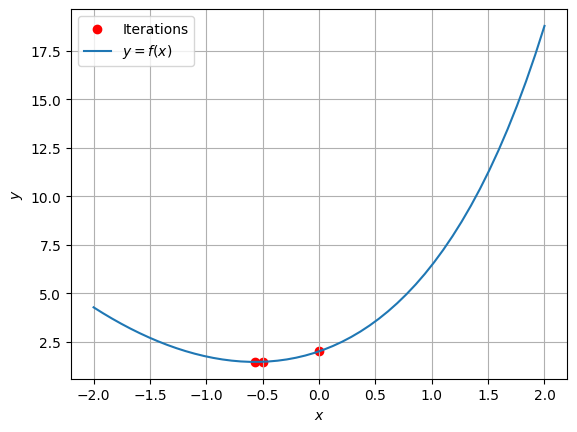

In [5]:
x = Newton(x_0 = 0)
y = f(x)
plt.scatter(x, y, color='r', label='Iterations')

x = np.linspace(-2, 2)
y = f(x)
plt.plot(x, y, label='$ y = f(x) $')

plt.grid()
plt.xlabel('$ x $')
plt.ylabel('$ y $')
plt.legend()
plt.show()
plt.show()

**Задание №9.2.1** Указанным в индивидуальном варианте методом найти минимумы и максимумы функции $ f(x) $ на отрезке $ \left[ x_1, x_2 \right] $ с точностью $ \varepsilon = 10^{-6} $. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.



$$
f(t) = \sin(t^2), \, t \in \left[ 0; 2 \right]
$$
Метод минимизации: золотого сечения.

In [6]:
def f(x):
    return np.sin(np.power(x, 2))

In [9]:
def GoldenRatiod(a, b, epsilon = 1e-6, mode='min'):
    PHI = (1 + np.sqrt(5)) / 2

    i = 0
    while np.abs(b - a) > epsilon:
        i += 1
        tmp = (b - a) / PHI

        x_1 = b - tmp
        x_2 = a + tmp

        y_1 = f(x_1)
        y_2 = f(x_2)

        if mode == 'min':
            if y_1 >= y_2:
                a = x_1
            else:
                b = x_2
        elif mode == 'max':
            if y_1 <= y_2:
                a = x_1
            else:
                b = x_2
    return i, (a + b) / 2


In [10]:
a = 0
b = 2
epsilon = 1e-6

i, x_min = GoldenRatiod(a, b, epsilon, mode='min')
j, x_max = GoldenRatiod(a, b, epsilon, mode='max')

print(i, x_min)
print(j, x_max)

31 3.3218739754091253e-07
31 1.253313988892751


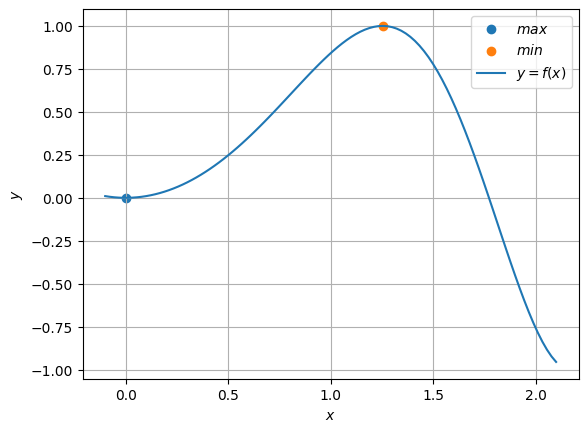

In [11]:
x = np.linspace(-0.1, 2.1, num=100)
y = f(x)

plt.scatter(x_min, f(x_min), label = '$ max $')
plt.scatter(x_max, f(x_max), label = '$ min $')

plt.plot(x, y, label = '$ y = f(x) $')
plt.grid()
plt.xlabel('$ x $')
plt.ylabel('$ y $')
plt.legend()
plt.show()

**Задание №9.5.1** Найти минимум функции 2-х переменных $ f(x, y) $ с точностью $ \varepsilon = 10^{-6} $ на прямоугольнике
$ \left[ x_1; x_2 \right] \times \left[ y_1; y_2 \right] $ .

$$
f(x, y) = x^2 + 2 y^2 - 4x - 4\sin(y), \\
(x, y) \in \left[ -2; 3 \right] \times \left[ -2; 4 \right]
$$

In [12]:
def f(x):
    return x[0]**2 + 2 * x[1]**2 - 4 * x[0] - 4 * np.sin(x[1])

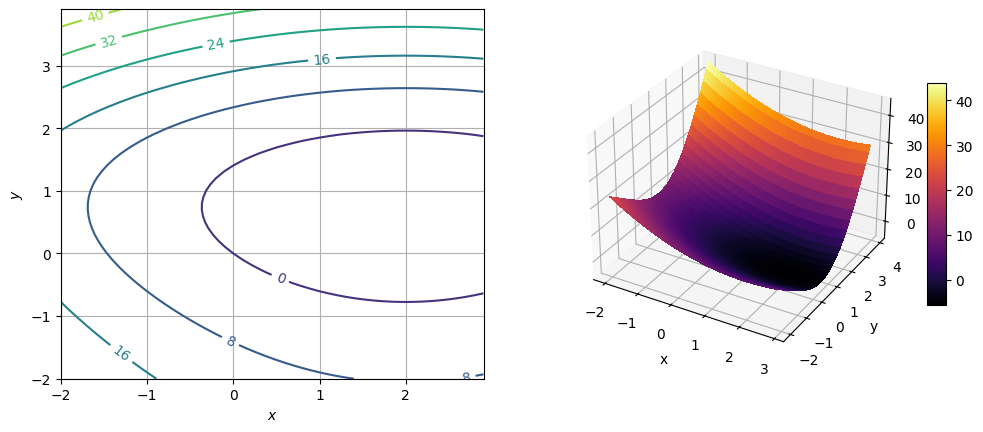

In [13]:
X = np.arange(-2, 3, 0.1)
Y = np.arange(-2, 4, 0.1)
X, Y = np.meshgrid(X, Y)

Z = f([X, Y])

fig = plt.figure(figsize=plt.figaspect(0.4))

# Plot the countour
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel('$ x $')
ax.set_ylabel('$ y $')
ax.grid()
ax.set_label('Contour')
cs = plt.contour(X, Y, Z)
ax.clabel(cs)


# Plot the surface
ax = fig.add_subplot(1, 2, 2, projection='3d')

surf = ax.plot_surface(X, Y, Z,
                       cmap=cm.inferno,
                       antialiased=False)

fig.colorbar(surf, shrink=0.6, aspect=12)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [14]:
x_0 = (2, 1)
res = minimize(f, x_0)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -5.601954448453508
        x: [ 2.000e+00  7.391e-01]
      nit: 3
      jac: [ 0.000e+00  3.576e-07]
 hess_inv: [[ 1.000e+00  0.000e+00]
            [ 0.000e+00  1.493e-01]]
     nfev: 15
     njev: 5

[[23.63718971 22.84718971 22.07718971 ...  8.12718971  8.27718971
   8.44718971]
 [23.00520035 22.21520035 21.44520035 ...  7.49520035  7.64520035
   7.81520035]
 [22.37539052 21.58539052 20.81539052 ...  6.86539052  7.01539052
   7.18539052]
 ...
 [41.49934456 40.70934456 39.93934456 ... 25.98934456 26.13934456
  26.30934456]
 [43.32743156 42.53743156 41.76743156 ... 27.81743156 27.96743156
  28.13743156]
 [45.17106464 44.38106464 43.61106464 ... 29.66106464 29.81106464
  29.98106464]]


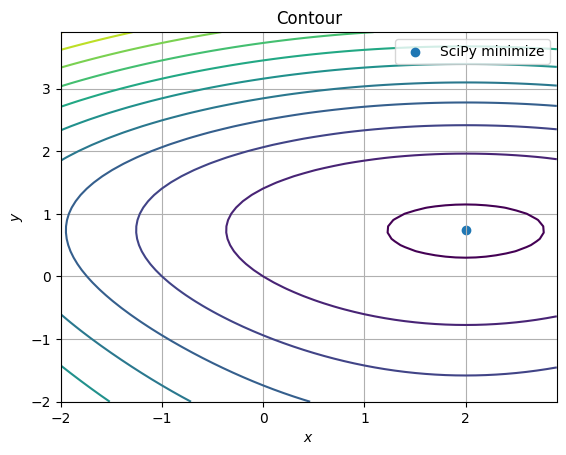

In [15]:
X = np.arange(-2, 3, 0.1)
Y = np.arange(-2, 4, 0.1)
X, Y = np.meshgrid(X, Y)

Z = f([X, Y])
print(Z)

plt.title('Contour')
plt.xlabel('$ x $')
plt.ylabel('$ y $')
plt.grid()

cs = plt.contour(X, Y, Z, levels=np.arange(-5, 50, 5))
plt.scatter(res.x[0], res.x[1], label='SciPy minimize')

plt.legend()
plt.show()

**Задание №9.6.1** Указанным в индивидуальном варианте методом найти минимум квадратичной функции $ f(x, y) = a_{11} x^2 + 2 a_{12} x y + a_{22} y^2 + 2 a_{13} x + 2 a_{23} y $ с точностью $ \varepsilon = 10^{-6} $. Для решения задачи одномерной минимизации использовать метод Ньютона. Построить график функции $ f $. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.

$$
f(x) = 2.5 x^2 + x y + 2 y^2 - 13 x -4.5 y
$$.
Метод: покоординатный спуск.

In [16]:
def f(x):
    return 2.5 * x[0]**2 + x[0] * x[1] + 2 * x[1]**2 - 13 * x[0] - 4.5 * x[1]

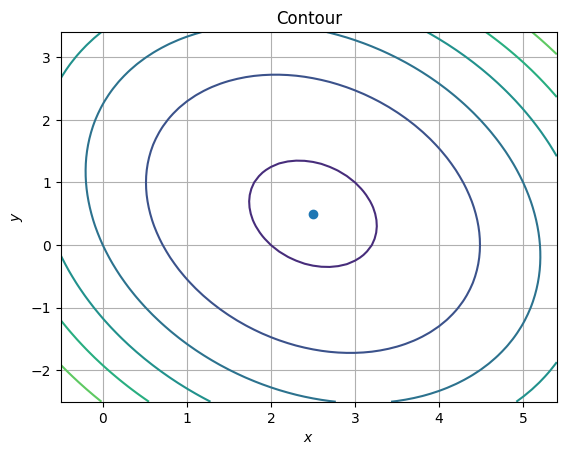

In [17]:
X = np.arange(2.5 - 3, 2.5 + 3, 0.1)
Y = np.arange(0.5 - 3, 0.5 + 3, 0.1)
X, Y = np.meshgrid(X, Y)

Z = f([X, Y])

x_0 = (2.5, 0.5)
res = minimize(f, x_0)
plt.scatter(res.x[0], res.x[1])

plt.title('Contour')
plt.xlabel('$ x $')
plt.ylabel('$ y $')
plt.grid()

cs = plt.contour(X, Y, Z)

plt.show()

In [18]:
def derivitive(f, dx=1e-6, order=1):
    return lambda x: (f(x + dx) - f(x)) / dx

In [19]:
def NewtonsMethod(f, x_0: float, epsilon=1e-6):
    f_1 = derivitive(f)
    f_2 = derivitive(f_1)

    x = x_0 - f_1(x_0) / f_2(x_0)
    dx = np.abs(x - x_0)

    i = 0
    while dx > epsilon:
        i += 1
        x_prev = x
        x = x_prev - f_1(x_prev) / f_2(x_prev)
        dx = np.abs(x - x_prev)

    return x

In [20]:
def CoordinateDescent(f, x_0, epsilon=1e-6):
    n = np.size(x_0)
    x = x_0

    res = [x_0]

    iteration = 0
    while True:
        # print(iteration, x)

        i = iteration % n
        # dy = np.zeros_like(x)

        dx = np.zeros_like(x)
        dx[i] = 1
        
        def g(a): 
            return f(x + a * dx)
        
        a = NewtonsMethod(g, 0)

        # dy[i] = f(x + a * dx) - f(x)
        x = x + a * dx

        iteration += 1
        res.append(x)

        if np.abs(a) < epsilon:
            break

    return np.array(res)

In [23]:
x_min = CoordinateDescent(f, (5, 3))
print(np.size(x_min))
print(x_min)

26
[[5.         3.        ]
 [1.9999995  3.        ]
 [1.9999995  0.62499962]
 [2.47499958 0.62499962]
 [2.47499958 0.50624961]
 [2.49874958 0.50624961]
 [2.49874958 0.50031211]
 [2.49993708 0.50031211]
 [2.49993708 0.50001523]
 [2.49999645 0.50001523]
 [2.49999645 0.50000039]
 [2.49999942 0.50000039]
 [2.49999942 0.49999964]]


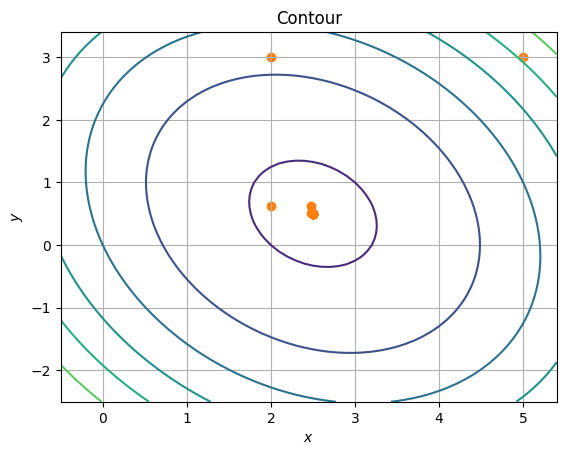

In [22]:
X = np.arange(2.5 - 3, 2.5 + 3, 0.1)
Y = np.arange(0.5 - 3, 0.5 + 3, 0.1)
X, Y = np.meshgrid(X, Y)

Z = f([X, Y])

x_0 = (2.5, 0.5)
res = minimize(f, x_0)
plt.scatter(res.x[0], res.x[1])

plt.title('Contour')
plt.xlabel('$ x $')
plt.ylabel('$ y $')
plt.grid()

cs = plt.contour(X, Y, Z)

x = x_min[:, 0]
y = x_min[:, 1]

plt.scatter(x, y)

plt.show()